In [111]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file = '/Users/zhaoxu/Library/CloudStorage/GoogleDrive-xu.zhao@york.ac.uk/My Drive/2.3- Code/Jupyter/PyHelios/testdata/130PP-15J-2ns.exo'
data = xr.open_dataset(file)

time = data['time_whole'].values 
radius = data['zone_boundaries'].values * 1e4
density = data['mass_density'].values  
ElecTemp = data['elec_temperature'].values 
pressure = (data['ion_pressure'].values + data['elec_pressure'].values)

max_density = np.max(density, axis=1)

In [127]:
density.shape

(502, 200)

In [125]:
radius_diff = np.diff(radius, axis=1) / 2
radius_edges = np.hstack(
    (
        radius[:, :1] - radius_diff[:, :1],
        radius[:, :-1] + radius_diff,
        radius[:, -1:] + radius_diff[:, -1:]
    )
)

radius_edges.shape

(502, 202)

In [126]:
radius_diff = np.diff(radius, axis=0) / 2
radius_edges = np.vstack((radius[0, :] - radius_diff[0, :],
                          radius[:-1, :] + radius_diff,
                          radius[-1, :] + radius_diff[-1, :]))
radius_edges.shape

(503, 201)

(-20.0, 100.0)

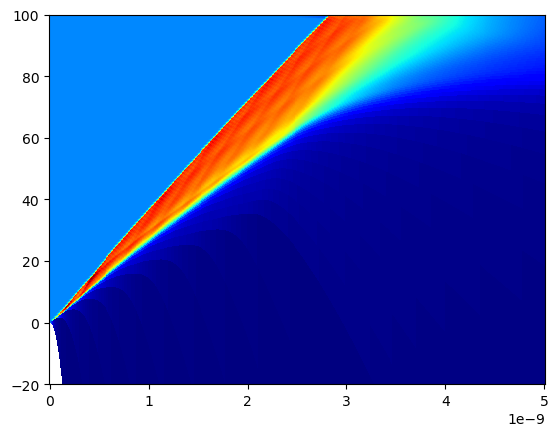

In [131]:


time_diff = np.diff(time) / 2
time_edges = np.concatenate(([time[0] - time_diff[0]], time[:-1] + time_diff, [time[-1] + time_diff[-1]]))

plt.pcolormesh(time_edges,radius_edges.T, density.T, shading='auto', cmap='jet',
               )
plt.ylim(-20, 100)


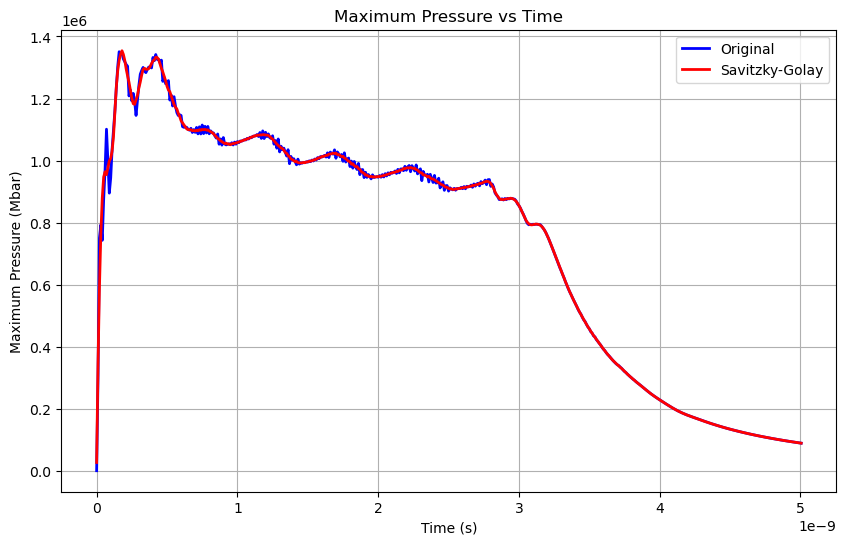

In [106]:
# 计算每个时间点下的最大压力
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline
max_pressure = np.max(pressure, axis=1)

# 保留第一个元素，只对后续元素做smooth
max_pressure_smooth1 = np.concatenate(([max_pressure[0]], gaussian_filter1d(max_pressure[1:], sigma=3)))
max_pressure_smooth2 = savgol_filter(max_pressure, window_length=11, polyorder=3)

# 绘制时间-最大压力图
plt.figure(figsize=(10, 6))
plt.plot(time, max_pressure , 'b-', linewidth=2,label='Original')  #
# plt.plot(time, max_pressure_smooth1 , 'r-', linewidth=2,label='Gaussian')  #
plt.plot(time, max_pressure_smooth2 , 'r-', linewidth=2,label='Savitzky-Golay')  #

plt.xlabel('Time (s)')
plt.ylabel('Maximum Pressure (Mbar)')
plt.title('Maximum Pressure vs Time')
plt.grid(True)
plt.legend()
plt.show()


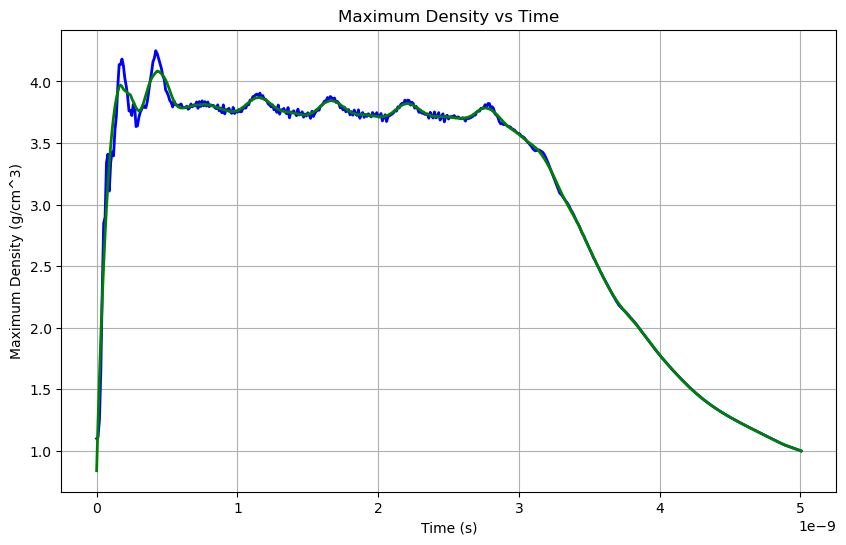

In [107]:
max_density = np.max(density, axis=1)
max_density_smooth1 = np.concatenate(([max_density[0]], gaussian_filter1d(max_density[1:], sigma=3)))
max_density_smooth2 = savgol_filter(max_density, window_length=31, polyorder=3,)

# 绘制时间-最大压力图
plt.figure(figsize=(10, 6))
plt.plot(time, max_density, 'b-', linewidth=2,label='Original')  # 转换为Mbar
# plt.plot(time, max_density_smooth1, 'r-', linewidth=2,label='Gaussian')  # 转换为Mbar
plt.plot(time, max_density_smooth2, 'g-', linewidth=2,label='Savitzky-Golay')  # 转换为Mbar
plt.xlabel('Time (s)')
plt.ylabel('Maximum Density (g/cm^3)')
plt.title('Maximum Density vs Time')
plt.grid(True)
plt.show()

In [6]:
time

array([1.000000e-15, 1.000000e-11, 2.000000e-11, 3.000000e-11,
       4.000000e-11, 5.000000e-11, 6.000000e-11, 7.000000e-11,
       8.000000e-11, 9.000000e-11, 1.000000e-10, 1.100000e-10,
       1.200000e-10, 1.300000e-10, 1.400000e-10, 1.500000e-10,
       1.600000e-10, 1.700000e-10, 1.800000e-10, 1.900000e-10,
       2.000000e-10, 2.100000e-10, 2.200000e-10, 2.300000e-10,
       2.400000e-10, 2.500000e-10, 2.600000e-10, 2.700000e-10,
       2.800000e-10, 2.900000e-10, 3.000000e-10, 3.100000e-10,
       3.200000e-10, 3.300000e-10, 3.400000e-10, 3.500000e-10,
       3.600000e-10, 3.700000e-10, 3.800000e-10, 3.900000e-10,
       4.000000e-10, 4.100000e-10, 4.200000e-10, 4.300000e-10,
       4.400000e-10, 4.500000e-10, 4.600000e-10, 4.700000e-10,
       4.800000e-10, 4.900000e-10, 5.000000e-10, 5.100000e-10,
       5.200000e-10, 5.300000e-10, 5.400000e-10, 5.500000e-10,
       5.600000e-10, 5.700000e-10, 5.800000e-10, 5.900000e-10,
       6.000000e-10, 6.100000e-10, 6.200000e-10, 6.3000

In [7]:
print(time.shape)
print(radius.shape)
print(density.shape)

(502,)
(502, 201)
(502, 200)


In [8]:
density.shape

(502, 200)

In [9]:
radius_diff = np.diff(radius, axis=0) / 2
radius_edges = np.vstack((radius[0, :] - radius_diff[0, :],
                          radius[:-1, :] + radius_diff,
                          radius[-1, :] + radius_diff[-1, :]))
radius_edges.shape

(503, 201)

In [10]:
time_diff = np.diff(time) / 2
time_edges = np.concatenate(([time[0] - time_diff[0]], time[:-1] + time_diff, [time[-1] + time_diff[-1]]))
time_edges.shape

(503,)

In [11]:
print(density.T.shape)
print(radius_edges.T.shape)
print(time_edges.shape)

(200, 502)
(201, 503)
(503,)


(-20.0, 100.0)

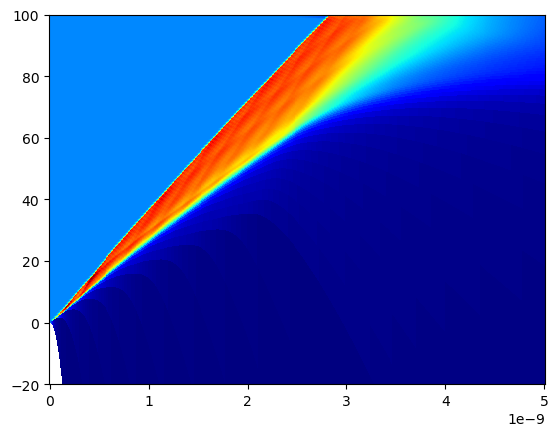

In [12]:
plt.pcolormesh(time_edges,radius_edges.T, density.T, shading='auto', cmap='jet',
               )
plt.ylim(-20, 100)

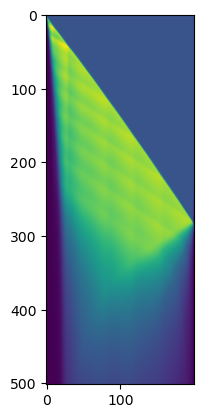

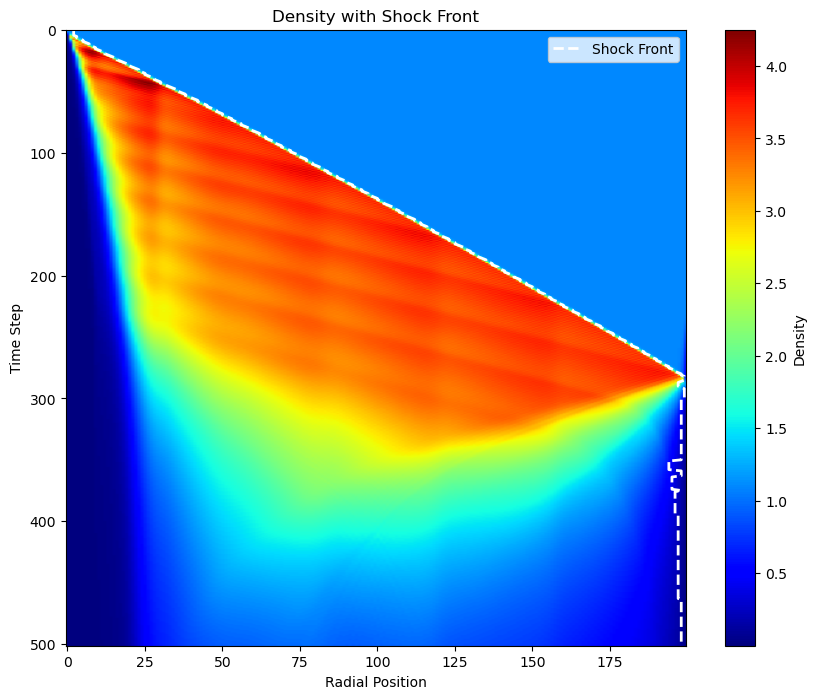

In [30]:
plt.imshow(density)
# 计算每一行的负梯度最大值位置
shock_positions = []
for i in range(density.shape[0]):
    rho = density[i, :]
    grad = np.gradient(rho)
    # 找到最大负梯度位置
    max_neg_grad_idx = np.argmin(grad)
    shock_positions.append(max_neg_grad_idx)
shock_positions = shock_positions[1:]

# 创建图像
plt.figure(figsize=(10, 8))
plt.imshow(density, aspect='auto', cmap='jet')
# 在图像上绘制冲击波位置
plt.plot(shock_positions, range(len(shock_positions)), 'w--', linewidth=2, label='Shock Front')
plt.colorbar(label='Density')
plt.xlabel('Radial Position')
plt.ylabel('Time Step')
plt.title('Density with Shock Front')
plt.legend()



In [41]:
shock_pos = []
for t in range(density.shape[0]):
    rho = density[t, 1:]  # 从索引1开始，忽略第一个元素
    grad = np.gradient(rho)
    
    # 方法1: 寻找全局最大负梯度（因为数据被转置）
    max_neg_grad_idx = np.argmin(grad)  # 最小值对应最大负梯度
    
    # 方法2: 寻找密度跳跃最大的位置（更鲁棒）
    # 计算密度比值来识别冲击波（修正为负梯度检测）
    rho_smooth = np.convolve(rho, np.ones(3)/3, mode='same')  # 平滑处理
    density_ratio = np.zeros_like(rho)
    for i in range(1, len(rho)-1):
        if rho_smooth[i+1] > 0:  # 修正：比较方向
            density_ratio[i] = rho_smooth[i-1] / rho_smooth[i+1]
    
    # 寻找密度比值最大且梯度为负的位置（修正条件）
    valid_indices = np.where((grad < 0) & (density_ratio > 1.1))[0]
    if len(valid_indices) > 0:
        # 在有效区域内寻找最大负梯度的位置
        local_grad = grad[valid_indices]
        relative_idx = np.argmin(local_grad)  # 最小值对应最大负梯度
        idx = valid_indices[relative_idx]
    else:
        # 回退到全局最大负梯度
        idx = max_neg_grad_idx if grad[max_neg_grad_idx] < 0 else np.argmin(grad)
    
    # 确保索引在有效范围内
    idx = max(0, min(idx, len(rho)-1))
    
    # 调整索引以匹配原始数据（加1因为我们跳过了第一个元素）
    original_idx = idx + 1
    
    # 计算对应的半径位置
    if radius_edges.shape[0] == density.shape[0] + 1:
        # 如果radius_edges是边界数组
        r = 0.5 * (radius_edges[t, original_idx] + radius_edges[t, original_idx+1])
    elif radius_edges.shape[1] == density.shape[0]:
        # 如果维度顺序不同
        r = radius_edges[original_idx, t]
    else:
        # 标准情况
        r = radius_edges[t, original_idx]
    
    shock_pos.append(r)
shock_pos[:3]
grad

array([ 3.26519935e-04,  3.14445276e-04,  2.87301217e-04,  2.52608241e-04,
        2.63071152e-04,  4.97570875e-04,  4.83039518e-03,  4.16716417e-03,
        6.67122793e-04,  2.75199752e-03,  3.81953629e-03,  4.33535451e-03,
        4.94977671e-03,  5.98561743e-03,  7.65975675e-03,  1.02853011e-02,
        1.47226886e-02,  2.27833469e-02,  3.65527279e-02,  5.25253020e-02,
        6.39131916e-02,  6.82221668e-02,  6.70145291e-02,  6.27074958e-02,
        5.64842185e-02,  4.86513822e-02,  3.93774519e-02,  2.99752556e-02,
        2.25328801e-02,  1.84417413e-02,  1.75599008e-02,  1.85754766e-02,
        1.99687383e-02,  2.07580410e-02,  2.05815677e-02,  1.95301658e-02,
        1.79817187e-02,  1.63580855e-02,  1.50387919e-02,  1.40456304e-02,
        1.31913124e-02,  1.23593296e-02,  1.15094275e-02,  1.06441785e-02,
        9.74695563e-03,  8.76501329e-03,  7.56619690e-03,  6.36028539e-03,
        5.29275913e-03,  4.19168091e-03,  3.22822082e-03,  2.51579600e-03,
        2.00460996e-03,  

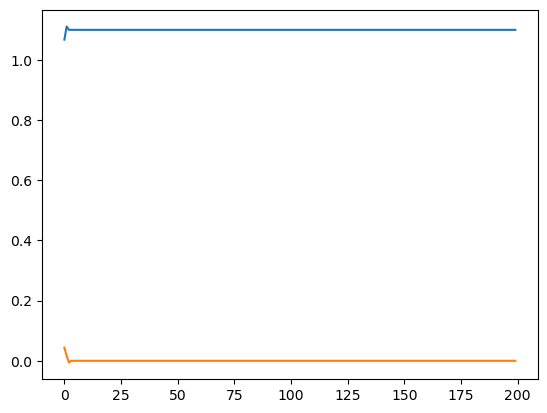

In [28]:
rho = density[1, :]
grad = np.gradient(rho)
plt.plot(rho)
plt.plot(grad)

/var/folders/8x/8b_22rcx3qvdx_26x022tzbw0000gn/T/ipykernel_73280/3233196070.py:61: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = plt.pcolormesh(T_mesh, R_mesh, rho, shading='auto', cmap='jet')


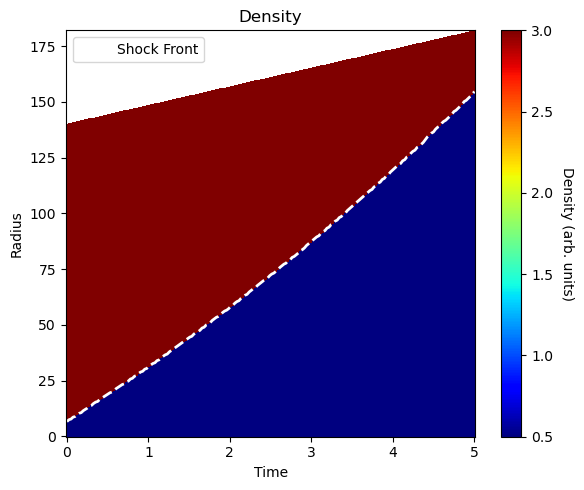

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# —— 假设你已经把真实模拟数据读到以下三个数组中 —— 
# t:   shape (ntime,)  的时间向量
# r:   shape (ntime, ncell)  的 Lagrange 网格位置
# rho: shape (ntime, ncell)  的密度数据

# 这里简单用示例数据代替，你在自己程序里改成加载真实数据即可：
ntime = 200
ncell = 500
t = np.linspace(0, 5, ntime)

# 构造一个“随时间膨胀的线性网格”，仅示范
r = np.zeros((ntime, ncell))
for j in range(ntime):
    r[j, :] = np.linspace(0, 140, ncell) * (1 + 0.3 * j/ntime)

# 构造一个“随时间向外推进的密度跳变”
rho = np.ones((ntime, ncell)) * 0.5
for j in range(ntime):
    pos_idx = int((ncell-1)*(0.05 + 0.8 * j/(ntime-1)))
    rho[j, pos_idx:] = 3.0

# —— 1. 计算每个时间步的“精确冲击位置” —— 
r_shock = np.zeros(ntime)
for j in range(ntime):
    r_j, rho_j = r[j, :], rho[j, :]

    # （1）平滑一下：这里用 3 点滑动平均再求梯度，减少数值振荡的影响
    window = 3
    rho_smooth = np.convolve(rho_j, np.ones(window)/window, mode='same')

    # （2）计算 drho/dr
    drho_dr = np.gradient(rho_smooth, r_j)

    # （3）找出“正向最大斜率”位置
    i0 = np.argmax(drho_dr)

    # （4）用“节点中点插值”修正：
    if i0 < ncell-1:
        # 左右节点
        r_left,  rho_left  = r_j[i0],   rho_j[i0]
        r_right, rho_right = r_j[i0+1], rho_j[i0+1]
        # 直接取中点
        # —— 如果你想用 '(rho_left + rho_right)/2' 作为阈值，再做线性插值，也可以：
        #   frac = ((rho_left+rho_right)/2 - rho_left) / (rho_right - rho_left)
        #   r_interp = r_left + frac * (r_right - r_left)
        r_interp = 0.5*(r_left + r_right)
    else:
        # 万一 i0 已经是最后一个节点，就直接用最后节点：
        r_interp = r_j[i0]

    r_shock[j] = r_interp

# —— 2. 用 pcolormesh 在“真实网格”上画出密度 + 叠加冲击线 —— 
T_mesh = np.tile(t.reshape(-1,1), (1, ncell))  # shape (ntime, ncell)
R_mesh = r.copy()                              # shape (ntime, ncell)

plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(T_mesh, R_mesh, rho, shading='auto', cmap='jet')
cbar = plt.colorbar(pcm)
cbar.set_label('Density (arb. units)', rotation=270, labelpad=15)

plt.plot(t, r_shock, 'w--', linewidth=2, label='Shock Front')
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Density')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
import os
from pathlib import Path
file_path = '/Users/zhaoxu/Library/CloudStorage/GoogleDrive-xu.zhao@york.ac.uk/My Drive/2.3- Code/Jupyter/PyHelios/testdata/130PP-15J-2ns.exo'
os.path.splitext(os.path.basename(file_path))[0]

'130PP-15J-2ns'